In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [57]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [61]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Found 2000 images belonging to 2 classes.


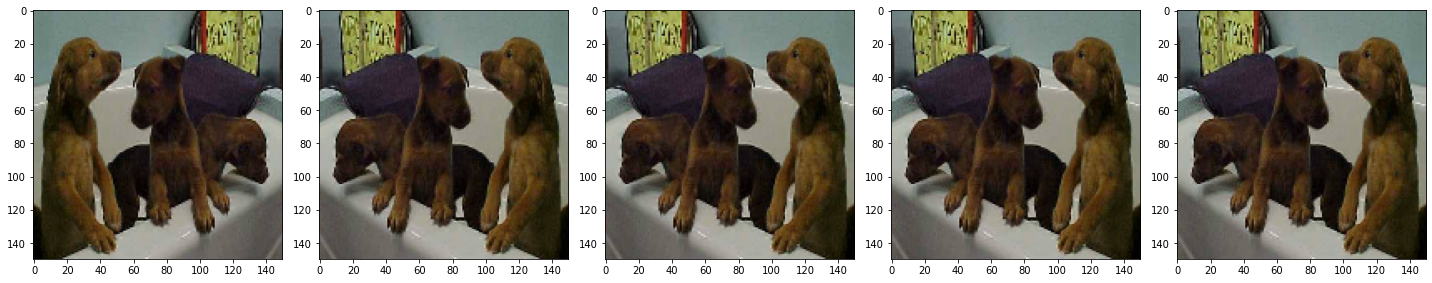

In [64]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))


augmented_images = [train_data_gen[2][0][5] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


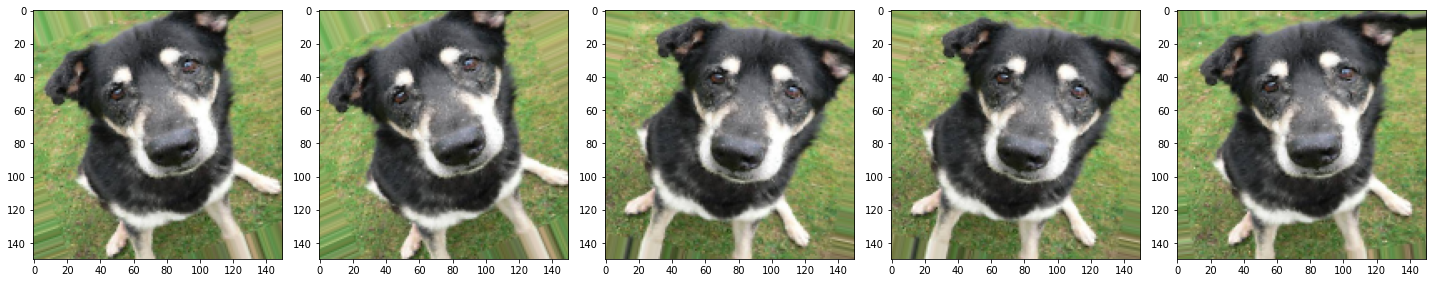

In [65]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[2][0][5] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


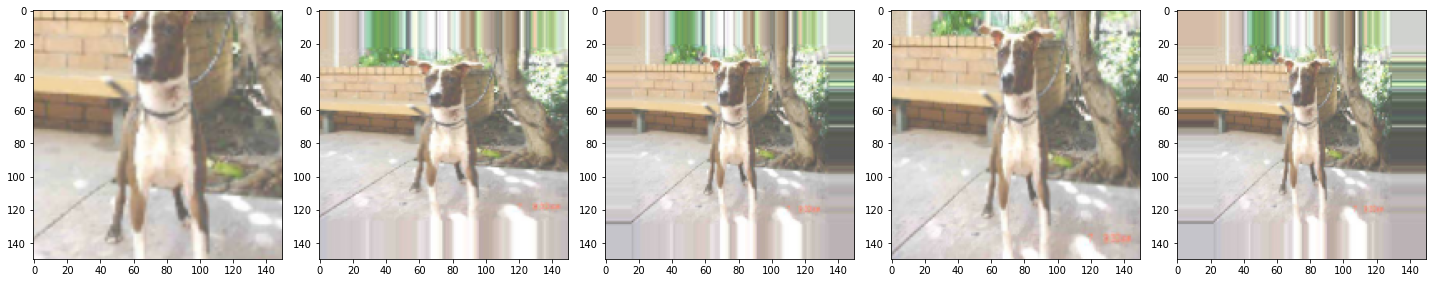

In [66]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


augmented_images = [train_data_gen[2][0][5] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


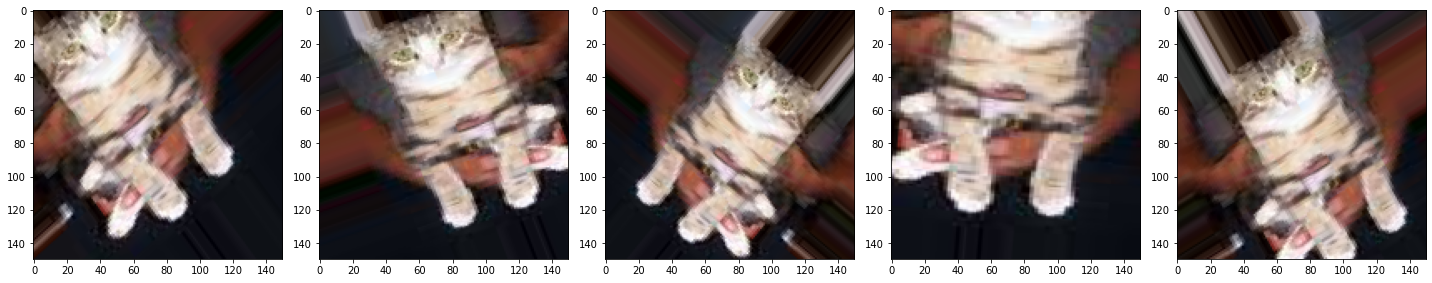

In [67]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [68]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [71]:
epochs=70
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/70
20/20 [==============================] - 16s 795ms/step - loss: 0.7131 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/70
20/20 [==============================] - 16s 784ms/step - loss: 0.6923 - accuracy: 0.5285 - val_loss: 0.6883 - val_accuracy: 0.5010
Epoch 3/70
20/20 [==============================] - 16s 787ms/step - loss: 0.6903 - accuracy: 0.5270 - val_loss: 0.6726 - val_accuracy: 0.6310
Epoch 4/70
20/20 [==============================] - 16s 778ms/step - loss: 0.6689 - accuracy: 0.5925 - val_loss: 0.6562 - val_accuracy: 0.5710
Epoch 5/70
20/20 [==============================] - 16s 784ms/step - loss: 0.6548 - accuracy: 0.6155 - val_loss: 0.6231 - val_accuracy: 0.6360
Epoch 6/70
20/20 [==============================] - 15s 772ms/step - loss: 0.6417 - accuracy: 0.6305 - val_loss: 0.6728 - val_accuracy: 0.5900
Epoch 7/70
20/20 [==============================] - 15s 774ms/step - loss: 0.6273 - accuracy: 0.6385 - val_loss: 0.6085 - val_accuracy: 0.6400

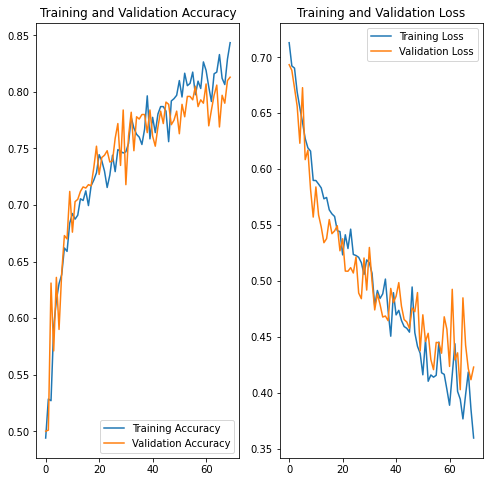

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show() 

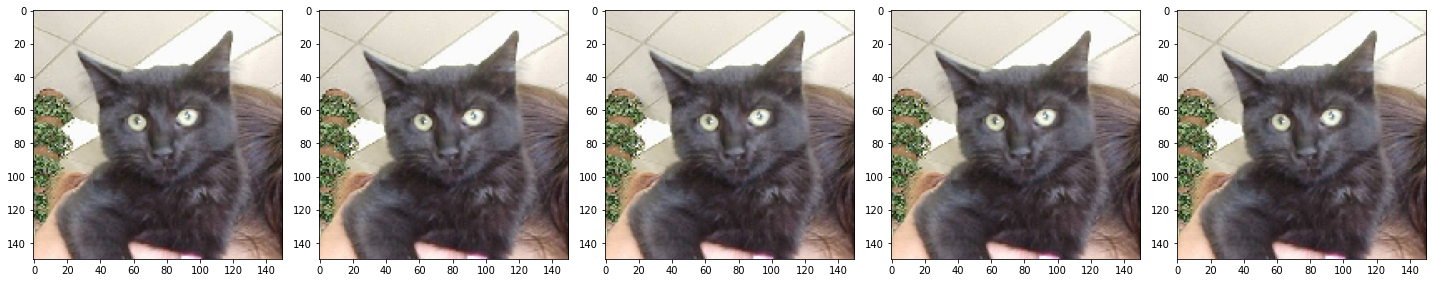

(150, 150, 3)


In [73]:
pred_valid = [val_data_gen[0][0][0] for i in range(5)]
plotImages(pred_valid)
print(val_data_gen[0][0][0].shape)

In [92]:
from google.colab import files
uploaded = files.upload()

Saving animal10.png to animal10.png


In [94]:
import matplotlib
from PIL import Image
my_images = []
for i in range(10):
    path = '/content/animal' + str(i + 1)+'.png'
    my_image = tf.keras.preprocessing.image.load_img(path, target_size=(150,150,3))
    my_image = np.array([tf.keras.preprocessing.image.img_to_array(my_image)])
    my_images.append(my_image)
my_image.shape

(1, 150, 150, 3)

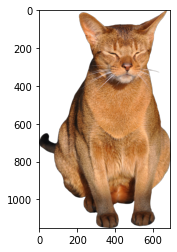

In [96]:
img = Image.open("/content/animal8.png")
plt.imshow(img)

In [97]:
category=['dog','cat']
for img in my_images:
    my_pred=model.predict(img)
    flag = np.argmax(my_pred)
    print(np.argmax(my_pred))
    print (category[flag])
    print(my_pred)

0
dog
[[18.75105 11.01278]]
0
dog
[[ 219.76004 -217.79149]]
0
dog
[[116.52057 -66.49551]]
1
cat
[[19.92471  30.286198]]
1
cat
[[-205.31067  326.2449 ]]
0
dog
[[ 261.48456 -173.53996]]
0
dog
[[ 374.0149  -315.04596]]
1
cat
[[-42.592163  97.57917 ]]
0
dog
[[ 274.9024  -215.53162]]
0
dog
[[ 220.07283 -233.12253]]
